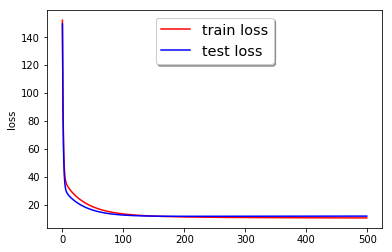

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

x_train,y_train=ds.load_svmlight_file("housing_scale.txt")#read data
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))#add bias to x
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3)#split data

#n:number of examples
n=np.shape(x_train)[0]
#m:number of features
m=np.shape(x_train)[1]

#initialize parameters with zero
W=np.zeros([m,1])

#loss function
def loss(X,Y,W):
    n=np.shape(X)[0]
    M=Y-X.dot(W)
    return (M.T.dot(M)/2/n)[0][0]

#gradient function
def gradient(X,Y,W):
    return 2*X.T.dot(X.dot(W)-Y)

L_train=[]
L_test=[]
#set learning rate
lr=0.0001
#begin training
for epoch in range(500):
    #compute gradient
    g=gradient(x_train,y_train,W)
    #update gradient
    W=W-lr*g
    #compute losses
    l_train=loss(x_train,y_train,W)
    L_train.append(l_train) 
    l_test=loss(x_test,y_test,W)
    L_test.append(l_test)

#draw figures
plt.ylabel("loss")
plt.plot(L_train,color='red',label='train loss')
plt.plot(L_test,color='blue',label='test loss')
plt.legend(loc='upper center',shadow=True,fontsize='x-large')
plt.show()